In [6]:
from keras.applications.inception_v3 import preprocess_input
from keras.models import model_from_yaml
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

# load YAML and create model
with open('inceptin_v3_faces_weights_best.yaml', 'r') as yaml_file:
    loaded_model_yaml = yaml_file.read()
loaded_model = model_from_yaml(loaded_model_yaml)

# load weights into new model
loaded_model.load_weights("inceptin_v3_faces_weights_best1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X_train, y_train, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Using TensorFlow backend.


Loaded model from disk


Number of faces detected: [[ 44  86 151 151]].
cv_rgb.shape=(250, 250, 3), cropped_image.shape=(224, 224, 3)


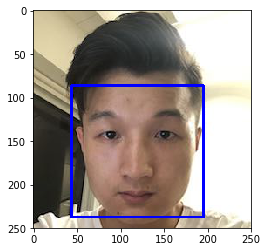

In [11]:
import cv2          
import numpy as np       
import matplotlib.pyplot as plt   
%matplotlib inline    

# 提取预训练的人脸检测模型
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

def extract_face_img(img):
    
    # 将BGR图像进行灰度处理
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 在图像中找出脸
    faces = face_cascade.detectMultiScale(gray)

    # 打印图像中检测到的脸的个数
    print('Number of faces detected: {}.'.format(faces))

    # 获取每一个所检测到的脸的识别框
    for (x,y,w,h) in faces:
        # 在人脸图像中绘制出识别框
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # 将BGR图像转变为RGB图像以打印
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #white_img = np.ones((224, 224, 1), np.uint8) * 255

    # 裁切图片
    # https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python
    src_w, src_h = cv_rgb.shape[0], cv_rgb.shape[1]
    target_w, target_h = 224, 224

    # 使用slicing去resize图片
    cropped_image = cv_rgb[:target_w, :target_h]

    print("cv_rgb.shape={}, cropped_image.shape={}".format(cv_rgb.shape, cropped_image.shape))
    return cv_rgb


file_name = 'WechatIMG267.jpeg' #'victor_test.jpg'

# 加载彩色（通道顺序为BGR）图像
img = cv2.imread(file_name)
cropped_img = extract_face_img(img)

# 展示含有识别框的图像
plt.imshow(cropped_img)
plt.show()
    

In [14]:


from glob import glob

faces_names = [item[10:] for item in sorted(glob("lfw/train/*"))]
    
cropped_image = extract_face_img(img = cv2.imread('WechatIMG267.jpeg'))
#print("cropped_image.shape={}".format(cropped_image.shape))

x = np.expand_dims(cropped_image, axis=0)
#print("x.shape={}".format(x.shape))

x = preprocess_input(x)
predictions = loaded_model.predict(x)

# 预测的概率数组
prediction_list = predictions[0]

# 取出最大概率值的索引
max_index = np.argmax(prediction_list)
print("The Max Probability : {} belongs to {}.".format(prediction_list[max_index], faces_names[max_index]))

Number of faces detected: [[ 44  86 151 151]].
cv_rgb.shape=(250, 250, 3), cropped_image.shape=(224, 224, 3)
The Max Probability : 0.620750904083 belongs to Aaron_Peirsol.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

cap = cv2.VideoCapture(0)

faces_names = [item[10:] for item in sorted(glob("lfw/train/*"))]

running_index = 0
ret = True
while (ret):
    # read image from camera 
    ret, image_np = cap.read()
    
    #print("----------{}, image.shape={}, ret={}".format(running_index, image_np.shape, ret))
    running_index+=1
    
    cropped_image = extract_face_img(image_np)
    #print("cropped_image.shape={}".format(cropped_image.shape))
    
    x = np.expand_dims(cropped_image, axis=0)
    #print("x.shape={}".format(x.shape))
    
    #x = preprocess_input(x)
    predictions = loaded_model.predict(x)

    # 预测的概率数组
    prediction_list = predictions[0]
    
    # 取出最大概率值的索引
    max_index = np.argmax(prediction_list)
    print("The Max Probability : {} belongs to {}.".format(prediction_list[max_index], faces_names[max_index]))
    
    cv2.imshow('image',cv2.resize(image_np, (960,700)))
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        cap.release()
        break



Number of faces detected: ().
cv_rgb.shape=(720, 1280, 3), cropped_image.shape=(224, 224, 3)
The Max Probability : 1.0 belongs to Abid_Hamid_Mahmud_Al-Tikriti.
Number of faces detected: ().
cv_rgb.shape=(720, 1280, 3), cropped_image.shape=(224, 224, 3)
The Max Probability : 1.0 belongs to Abid_Hamid_Mahmud_Al-Tikriti.
Number of faces detected: [[520 273 377 377]].
cv_rgb.shape=(720, 1280, 3), cropped_image.shape=(224, 224, 3)
The Max Probability : 0.999912381172 belongs to Abid_Hamid_Mahmud_Al-Tikriti.
Number of faces detected: [[428 344 282 282]].
cv_rgb.shape=(720, 1280, 3), cropped_image.shape=(224, 224, 3)
The Max Probability : 0.949044406414 belongs to Abdullah_Gul.
Number of faces detected: [[416 345 287 287]].
cv_rgb.shape=(720, 1280, 3), cropped_image.shape=(224, 224, 3)
The Max Probability : 0.861108064651 belongs to Abid_Hamid_Mahmud_Al-Tikriti.
Number of faces detected: [[393 332 322 322]].
cv_rgb.shape=(720, 1280, 3), cropped_image.shape=(224, 224, 3)
The Max Probability : 